# Exercise Part 2: Data Visualizations
Author: J. Tyler Bittner

[Part 1 - EDA and Data Cleaning](Exercise%20Part%201%20-%20EDA%20and%20Data%20Cleaning.ipynb)

**Assignment:**

> For the Data Visualization portion, find a dataset and create 4 to 5 visualizations in two ways. First, have static visual representations of your data then use Bokeh with the same data. Please provide a write up on the pros and cons of static vs dynamic representations of your data. Please commit your work to GitHub.

# Visualizations of prescription drug spending & costs

Now that we have a clean and tidy prescription drug data set let's visualize the data for insights!  I'll be guided by some of the EDA done in [Part 1](Exercise%20Part%201%20-%20EDA%20and%20Data%20Cleaning.ipynb).  I'll focus on the following questions:

1. Does spending change as people get older?
1. In which subcategories of drugs is spending highest?
1. How does prescription drug utilization change by age and subcategory?
1. What variables affect drug price?
1. How do price and spending change over time?

In [1]:
# Load prescription drug spending data set cleaned in Part 1
import os
import pandas as pd

df = pd.read_csv(os.path.join('exercise_files', 'rx_df_tidy.csv'), index_col=0)
#df.head()

In [8]:
# Load modules for later use
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set viz defaults
plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

## Spending and utilization increase with age

Not surprisingly, both spending and utilization of services rise significantly with age as health issues needing treatment increase.  The variability also rises accordingly as shown by the error bars.

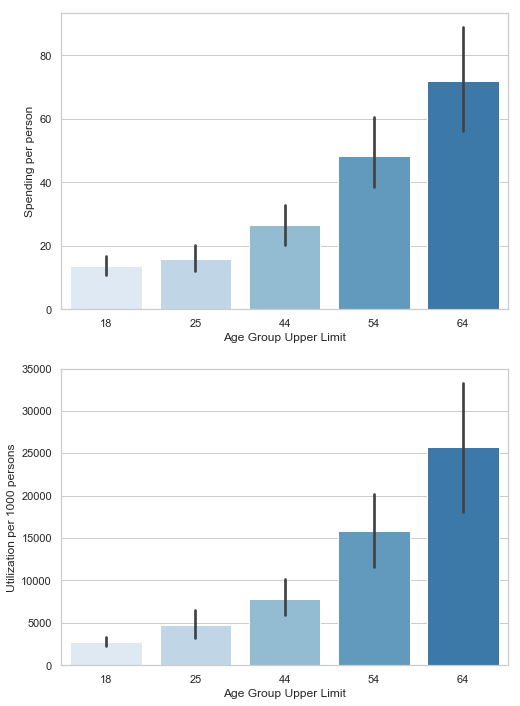

In [3]:
plt.figure(figsize = (8, 12))

plt.subplot(2, 1, 1)
sns.set_palette(sns.color_palette("Blues"))
sns.barplot(x='Age Group Upper Limit', y='Spending per person', data=df)

plt.subplot(2, 1, 2)
sns.set_palette(sns.color_palette("Blues"))
sns.barplot(x='Age Group Upper Limit', y='Utilization per 1000 persons', data=df)
plt.show()

## The most life-critical categories appear to have the highest spending
Aside from the ambiguous "Other" category, the categories I assume are most critical to life receive the most spending: Central Nervous System, Hormones, Anti-Infectives, and Cardiovascular.  EENT (eye, ear, nose, and throat) has the lowest spending.

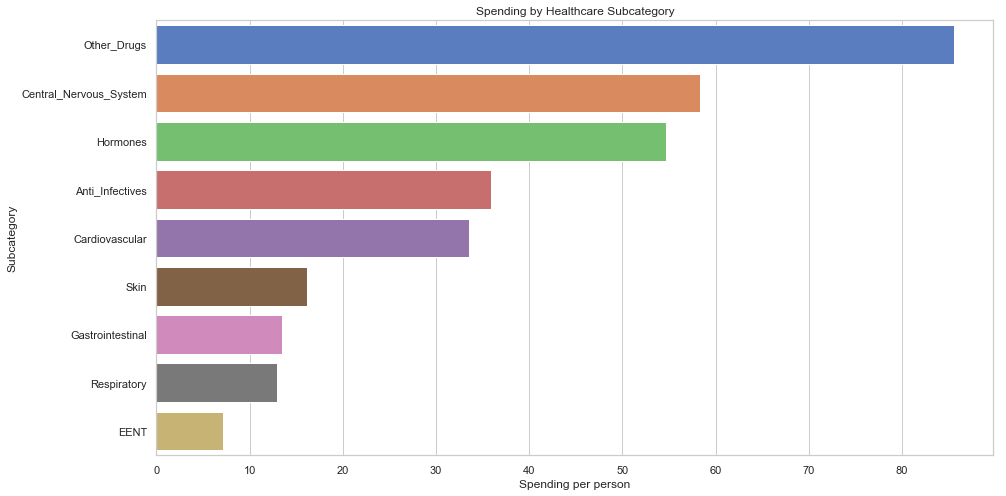

In [41]:
df_sorted = df.groupby('Subcategory').mean().sort_values('Spending per person', ascending=False)
df_sorted.reset_index(inplace=True)
df_sorted.head()

plt.figure(figsize = (15, 8))
sns.set_palette(sns.color_palette("muted"))
sns.barplot(x='Spending per person', y='Subcategory', data=df_sorted)
plt.title('Spending by Healthcare Subcategory')
plt.show()

### Interactive Bokeh version
Run with these commands:
```
$ cd exercise_files
$ bokeh serve --show bokeh_spending_by_cat.py
```

## Utilization for age-related conditions increases with age

No surprise here as well.  Drug utilization increases dramatically for the types of conditions you would expect to become more problematic with age, such as Cardiovascular, Central Nervous System, and Hormones.

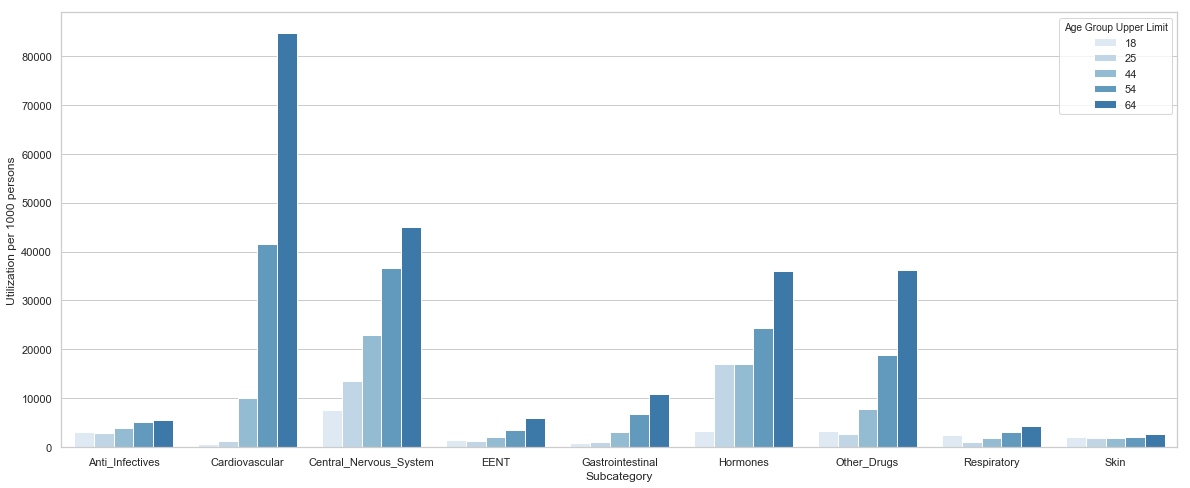

In [5]:
plt.figure(figsize = (20, 8))
sns.set_palette(sns.color_palette("Blues"))
sns.barplot(x='Subcategory', y='Utilization per 1000 persons', hue='Age Group Upper Limit', data=df, ci=None)
plt.show()

## Both average spending and price have increased over time
In the five years data were collected, we can see both spending and price of perscription drugs increased significantly.

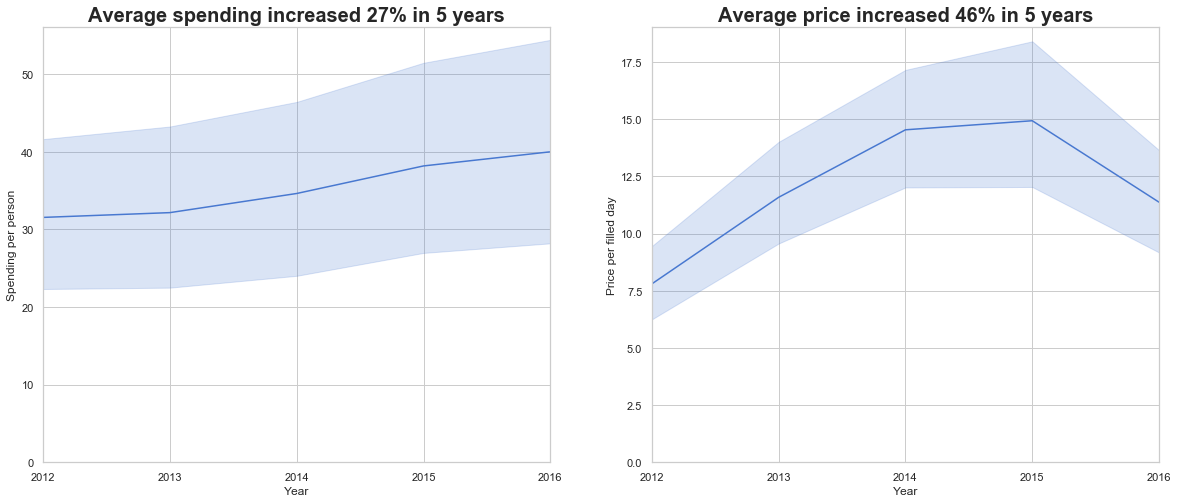

In [7]:
sns.set_palette(sns.color_palette("muted"))

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)

# Get precent changes
spending = df.groupby('Year').mean()['Spending per person']
spending_change = (spending.iloc[-1] - spending.iloc[0]) / spending.iloc[0] * 100

price = df.groupby('Year').mean()['Price per filled day']
price_change = (price.iloc[-1] - price.iloc[0]) / price.iloc[0] * 100

# Create plots
sns.lineplot(x='Year', y='Spending per person', data=df)
plt.title('Average spending increased {:.0f}% in 5 years'.format(spending_change),
         fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xticks(df['Year'].unique())
plt.xlim(df['Year'].min(), df['Year'].max())
plt.ylim(0)

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Price per filled day', data=df)
plt.title('Average price increased {:.0f}% in 5 years'.format(price_change),
         fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.xticks(df['Year'].unique())
plt.xlim(df['Year'].min(), df['Year'].max())
plt.ylim(0)
plt.show()

# Summary: Static vs dynamic representations

Static data visualizations are preferable when:
- You want to communicate a specific insight
- You want to tell a story by guiding the audience through a sequence of insights

Dynamic visualizations are better when:
- You want to provide users flexibility in exploring the data
- You don't know the insights in advance and want to enable the user to discover them